### Logistic Regression

*Linear Regression:* $\hat{y} = w.X +b$ <br>
*Logistic Regression:* $\hat{y} = sigmoid(w.X +b)$

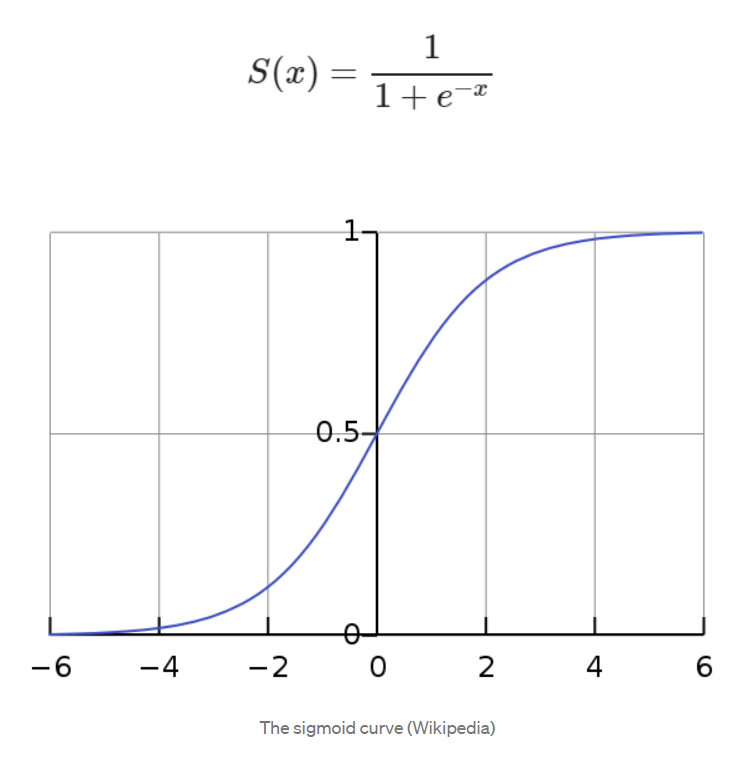

In [4]:
from IPython.display import Image
#path=""
Image(data = path, width=400)

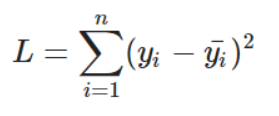

In [5]:
from IPython.display import Image
#path=""
Image(data = path, width=200)


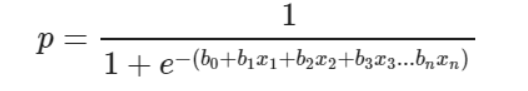

In [7]:
from IPython.display import Image
#path=""
Image(data = path, width=400)


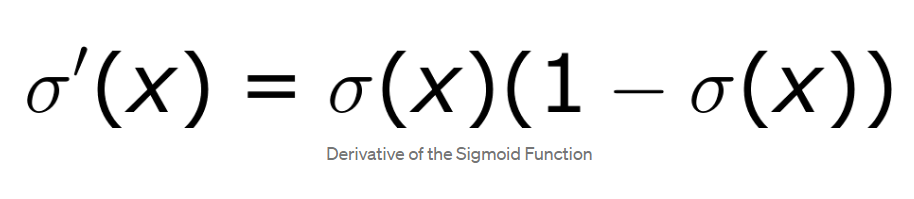

In [8]:
from IPython.display import Image
#path=""
Image(data = path, width=500)

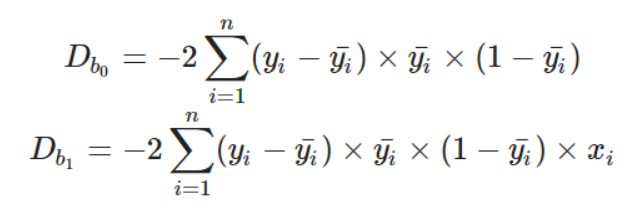

In [9]:
from IPython.display import Image
#path=""
Image(data = path, width=400)

In [4]:
import pandas as pd
import numpy as np
df_bank = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')
df_bank.drop(columns="duration", inplace=True)
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no


In [5]:
df_bank["deposit"].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [6]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
cat_cols = ["job","marital","education","default","housing","loan","contact","month","poutcome"]
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank[cat_cols]))
df_encoded.columns = encoder.get_feature_names_out(cat_cols)
df_encoded

C:\Users\serha\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
df_bank.drop(columns = cat_cols, inplace=True)
df_bank = pd.concat([df_encoded, df_bank], axis=1)
df_bank

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,59,2343,5,1,-1,0,yes
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,56,45,5,1,-1,0,yes
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,41,1270,5,1,-1,0,yes
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,55,2476,5,1,-1,0,yes
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,54,184,5,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,33,1,20,1,-1,0,no
11158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,39,733,16,4,-1,0,no
11159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,32,29,19,2,-1,0,no
11160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,43,0,8,2,172,5,no


In [9]:
df_bank['deposit'] = df_bank['deposit'].apply(lambda x: 1 if x == 'yes' else 0)


In [10]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_bank_ready = df_bank.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank_ready[num_cols] = scaler.fit_transform(df_bank[num_cols])

df_bank_ready.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.491505,0.252525,-1.265746,-0.554168,-0.481184,-0.36326,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.239676,-0.459974,-1.265746,-0.554168,-0.481184,-0.36326,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.019470,-0.080160,-1.265746,-0.554168,-0.481184,-0.36326,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.155733,0.293762,-1.265746,-0.554168,-0.481184,-0.36326,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.071790,-0.416876,-1.265746,-0.186785,-0.481184,-0.36326,1


In [11]:
df_bank_ready.corr()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
job_admin.,1.000000,-0.169190,-0.064104,-0.058445,-0.201292,-0.100845,-0.071487,-0.110616,-0.067258,-0.162775,...,0.007513,0.005628,-0.031759,-0.057458,-0.038001,-0.013901,-0.017881,0.044068,0.022699,-0.000610
job_blue-collar,-0.169190,1.000000,-0.079905,-0.072850,-0.250905,-0.125701,-0.089107,-0.137880,-0.083836,-0.202896,...,-0.002788,-0.077422,0.066703,-0.066567,-0.046220,-0.023039,0.005522,-0.030695,-0.039939,-0.100840
job_entrepreneur,-0.064104,-0.079905,1.000000,-0.027602,-0.095065,-0.047627,-0.033762,-0.052241,-0.031764,-0.076875,...,-0.024244,-0.035072,0.036967,0.024176,0.005039,-0.004463,0.013883,-0.029732,-0.022470,-0.034443
job_housemaid,-0.058445,-0.072850,-0.027602,1.000000,-0.086673,-0.043422,-0.030781,-0.047629,-0.028960,-0.070088,...,-0.011314,-0.008434,0.023429,0.082739,-0.007987,0.013318,0.010570,-0.025950,-0.022766,-0.024155
job_management,-0.201292,-0.250905,-0.095065,-0.086673,1.000000,-0.149550,-0.106014,-0.164041,-0.099742,-0.241392,...,0.017462,0.033104,-0.036213,-0.046492,0.044912,0.008711,0.015988,0.015704,0.022079,0.036301
job_retired,-0.100845,-0.125701,-0.047627,-0.043422,-0.149550,1.000000,-0.053112,-0.082183,-0.049970,-0.120935,...,-0.002350,0.072092,-0.037441,0.555863,0.075423,-0.004511,-0.037943,0.004212,0.019384,0.103827
job_self-employed,-0.071487,-0.089107,-0.033762,-0.030781,-0.106014,-0.053112,1.000000,-0.058258,-0.035423,-0.085728,...,0.005632,-0.001399,0.005394,-0.023163,0.020264,0.006458,0.001776,-0.011224,-0.002338,-0.004707
job_services,-0.110616,-0.137880,-0.052241,-0.047629,-0.164041,-0.082183,-0.058258,1.000000,-0.054811,-0.132652,...,-0.012776,-0.029337,0.028030,-0.077879,-0.041646,0.002497,0.007496,0.000595,-0.019366,-0.044531
job_student,-0.067258,-0.083836,-0.031764,-0.028960,-0.099742,-0.049970,-0.035423,-0.054811,1.000000,-0.080657,...,0.037158,0.055885,-0.060027,-0.231846,-0.001571,-0.010472,-0.022735,0.029129,0.037012,0.099953
job_technician,-0.162775,-0.202896,-0.076875,-0.070088,-0.241392,-0.120935,-0.085728,-0.132652,-0.080657,1.000000,...,-0.007592,-0.014744,0.009565,-0.082716,0.003802,0.027038,0.021738,-0.016588,0.002035,-0.011557


In [12]:
from sklearn.model_selection import train_test_split

# Select Features
feature = df_bank_ready.drop('deposit', axis=1)

# Select Target
target = df_bank_ready['deposit']

X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = False, 
                                                    test_size=0.002, 
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(11139, 50)
(23, 50)
(11139,)
(23,)


In [13]:
def predict(X, b):
    X_temp = X.copy()
    out = np.zeros((X_temp.shape[0],))
    for i in range(X_temp.shape[0]):
        out[i] = 1 / (1+np.exp(-b[0]-sum(X_temp.iloc[i,:]*b[1:])))
    return out

In [14]:
from tqdm import trange
def logistic_regression(X, Y, learning_rate=0.02, epoch=100):
    X_temp = X.copy()
    X_temp = pd.concat([pd.Series(np.ones((X_temp.shape[0],))), X_temp], axis=1)
    
    b = np.zeros((X_temp.shape[1],))
    for i in trange(epoch):
        y_pred = predict(X, b)
        for j in range(len(b)):
            grad = -2*sum(X_temp.iloc[:,j]*(Y - y_pred)*y_pred*(1-y_pred))
            b[j] = b[j] - learning_rate*grad
    return b  

In [15]:
# Training the model

b = logistic_regression(X_train, y_train)

# Making predictions
print(type(X_test))
print(b.shape)
y_pred = predict(X_test, b)
print(y_pred[:10])
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]


100%|██████████| 100/100 [01:56<00:00,  1.17s/it]

<class 'pandas.core.frame.DataFrame'>
(51,)
[1.56578276e-10 1.99314513e-21 1.27395098e-07 3.00030155e-05
 1.33395560e-07 3.39496086e-10 9.99778126e-01 1.23390585e-04
 1.23449567e-05 7.35624799e-14]


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9565217391304348